# Car price linear regression

### Feature Analysis Table

| Feature | Definition | Discussion |
|---------|------------|------------|
| Name | Brand and model of the car | Consider dropping as it's too specific for regression. Could extract brand name as a categorical feature if needed. |
| Year | Manufacturing year of the car | Requires normalization/scaling. 
| Selling_price | Price at which the car is listed for sale | Target variable. Consider log transformation. |
| km_driven | Total kilometers traveled by the car | Requires normalization/scaling. Strong indicator of car condition and value. |
| Fuel | Type of fuel used by the car | Binary encoding appropriate (Petrol/Diesel) after removing rare categories (LPG/CNG). Use one-hot encoding if keeping all fuel types. |
| Seller_type | Category of seller (Individual/Dealer/Trustmark Dealer) | One-hot encoding recommended as categories are nominal with no inherent order. |
| Transmission | Type of transmission (Manual/Automatic) | Binary encoding sufficient as there are only two categories. No need for one-hot encoding. |
| Owner | Number of previous owners | Ordinal encoding recommended (First=1, Second=2, Third=3) as there's a natural hierarchy that correlates with value. |
| Mileage | Fuel efficiency (kmpl) | Extract numeric values only (e.g., "20.0 kmpl" → 20.0). Important efficiency indicator. |
| Engine | Engine displacement in CC | Extract numeric values only (e.g., "1248 CC" → 1248). Key technical specification. |
| Max_power | Engine power in bhp | Extract numeric values only (e.g., "74 bhp" → 74). Important performance indicator. |
| Torque | Engine torque | Consider dropping due to complex parsing needs and lower correlation with price. If kept, needs standardized extraction of numeric values. |
| Seats | Number of seats in the car | Keep as is. Check for missing values and outliers. Generally stable feature with minimal preprocessing needed. |

## Task1

## 0. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.26.4', '2.2.3', '0.13.2', '3.10.0')

## 1. Load data

In [3]:
df = pd.read_csv('../data/Cars.csv')

In [4]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Check the shape of data
df.shape

(8128, 13)

In [6]:
# Check Dtypes of input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 2. Exploratory Data Analysis

#### "Owner": As per instructions, map the first = 1, second =2, third = 3, fourth = 4 and test_drive_car to 5. 

In [8]:
# Define a custom mapping
mapping = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 5
}

# Apply the mapping
df["owner"] = df["owner"].map(mapping)

# Check the results
print(df["owner"].unique())  # Output: [1, 2, 3, 4, 5]

[1 2 3 4 5]


In [9]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


#### "fuel": As per instruction, drop all rows with CNG and LPG becuase they are using different mileage system. 

In [10]:
df['fuel'].unique() # check the original df['fuel']

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [11]:
# remove the rows with fuel type CNG and LPG
df = df[df.fuel != 'CNG']
df = df[df.fuel != 'LPG'] 

In [12]:
df['fuel'].unique() # check the modified df['fuel']

array(['Diesel', 'Petrol'], dtype=object)

#### "mileage": As per instruction, remove 'kmpl' and convert column to numerial type

In [13]:
df['mileage'] # check the original df['mileage']

0        23.4 kmpl
1       21.14 kmpl
2        17.7 kmpl
3        23.0 kmpl
4        16.1 kmpl
           ...    
8123     18.5 kmpl
8124     16.8 kmpl
8125     19.3 kmpl
8126    23.57 kmpl
8127    23.57 kmpl
Name: mileage, Length: 8033, dtype: object

In [14]:
df['mileage'] = df.mileage.str.split().str[0].astype(float) # remove the kmpl from mileage and convert it to float

In [15]:
df['mileage'] # check the modified df['mileage']

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 8033, dtype: float64

#### "Engine": As per instruction, remove 'CC' and convert column to numerial type

In [16]:
df['engine'] = df.engine.str.split().str[0].astype(float) # remove CC from engine and convert it to float

In [17]:
df['engine'] # check the modified df['engine']

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: engine, Length: 8033, dtype: float64

#### "Max_power": As per instruction, remove 'bhp' and convert colum to numerial type 

In [18]:
df['max_power'] = df.max_power.str.split().str[0].astype(float) # remove bhp from max_power and convert it to float

In [19]:
df['max_power'] #  check the modified df['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8033, dtype: float64

#### "Brand": Takes only the first word and remove the rest

In [20]:
df['name'] = df.name.str.split().str[0] # remove the model name and keep only the brand name
df.rename(columns={'name': 'brand'}, inplace=True) # rename the column name to brand

In [21]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


#### "Torque": Drops this feature according to the instruction

In [22]:
df = df.drop(['torque'], axis=1) # drop the torque column

#### "Test Drive Cars": Delete all samples related to this becuase they are very expansive and we don't wnat to involve this

In [23]:
df['owner'].unique() # check the original df['owner']

array([1, 2, 3, 4, 5])

In [24]:
df[df['owner'] == 5] # check the rows with owner = 5

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4383,Volkswagen,2019,1350000,5400,Diesel,Dealer,Manual,5,22.27,1498.0,108.60,5.0
4950,Audi,2019,6223000,7800,Petrol,Dealer,Automatic,5,15.26,1798.0,187.74,5.0
4951,Audi,2019,5923000,11500,Petrol,Dealer,Automatic,5,15.26,1798.0,187.74,5.0
4952,Audi,2019,6523000,23600,Petrol,Dealer,Automatic,5,15.26,1798.0,187.74,5.0
6220,Honda,2019,2000000,24857,Petrol,Dealer,Automatic,5,16.50,1799.0,139.46,5.0


In [25]:
# Since they are significantly large values, so we can drop them

df = df[df.owner != 5]

In [26]:
df['owner'].unique() # check the modified df['owner']

array([1, 2, 3, 4])

### 2.1 Univariate analyis

Single variable exploratory data anlaysis

In [27]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


#### Countplot

In [28]:
## Countplot - Best for categorical variables to understand frequency:
## In this case, I will be analyzed 'fuel, 'seller_type', 'transmission', 'owner', 'seats' features using countplots

<Axes: xlabel='fuel', ylabel='count'>

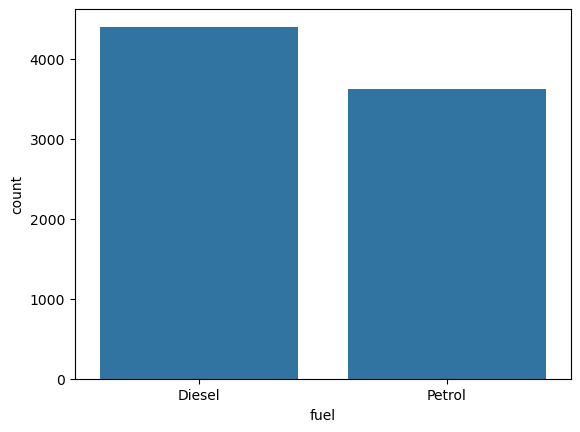

In [29]:
# Shows proportion of Diesel vs Petrol cars and it seems that they are almost equal
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='seller_type', ylabel='count'>

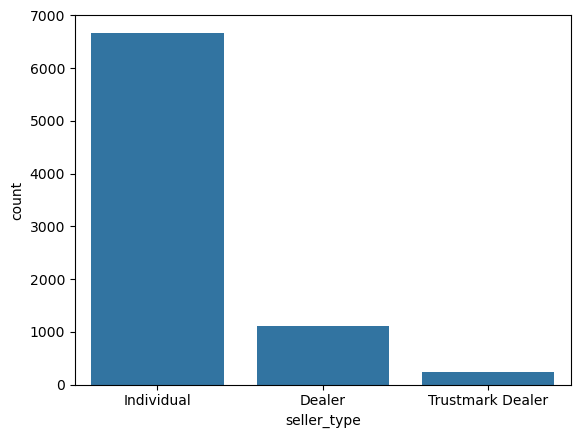

In [30]:
# We can see the individual sellers are more dominant than the other two types
sns.countplot(data = df, x = 'seller_type') 

<Axes: xlabel='transmission', ylabel='count'>

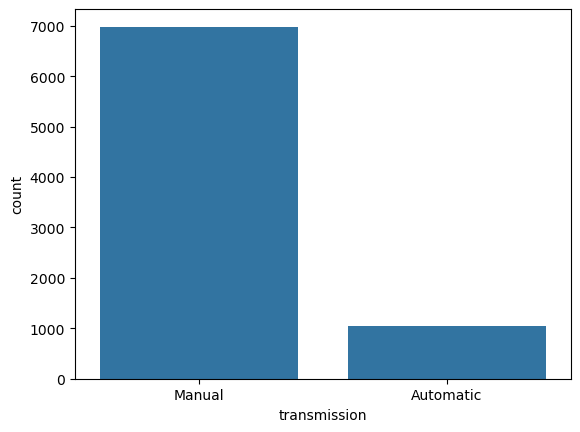

In [31]:
# we can see that manual cars are more prefrable than automatic cars in the market
sns.countplot(data = df, x = 'transmission') 

<Axes: xlabel='seats', ylabel='count'>

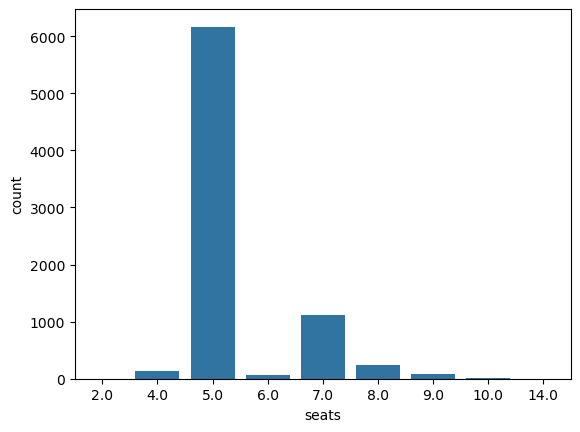

In [32]:
# we can see that most cars have 5 seats
sns.countplot(data = df, x = 'seats')

<Axes: xlabel='owner', ylabel='count'>

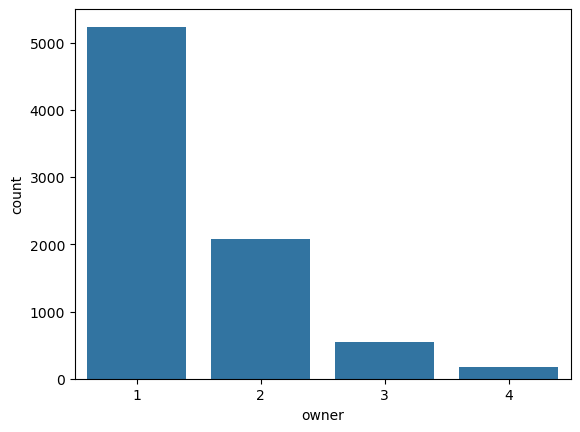

In [33]:
# we can see that most cars are first owner
sns.countplot(data = df, x = 'owner')

##### Insights: As per above analysis, we can conclude that 
 - The market is balanced between disel and pertol cars
 - Buyers preferred manual cars from indiviual sellers
 - Cars with 5 seats are dominant and First-owners cars are most wanted

#### Distribution plot

In [34]:
# Distribution Plot - Best for continuous variables to understand their spread and patterns
# In this case, I will be analyzed 'km_driven', 'mileage', 'engine', 'max_power' features using distribution plots

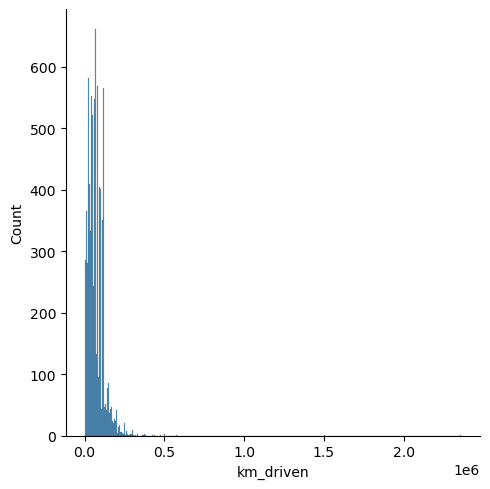

In [35]:
sns.displot(data = df, x = 'km_driven') # km_driven is right skewed

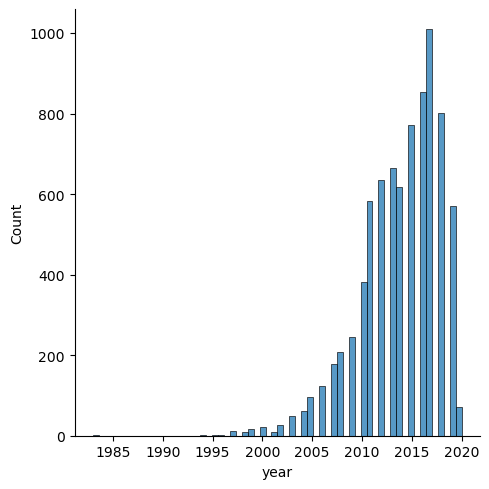

In [36]:
sns.displot(data = df, x = 'year') # year is left skewed

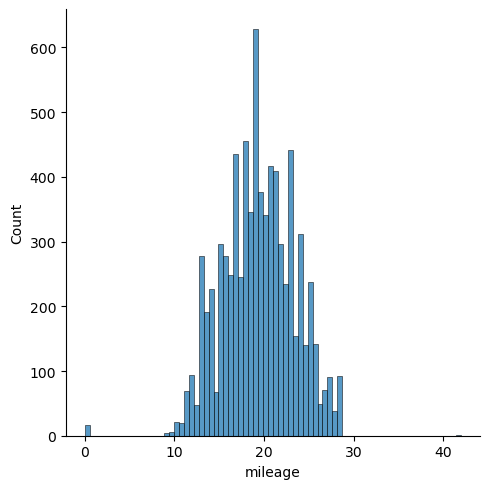

In [37]:
sns.displot(data = df, x = 'mileage') # mileage is normally distrubuted

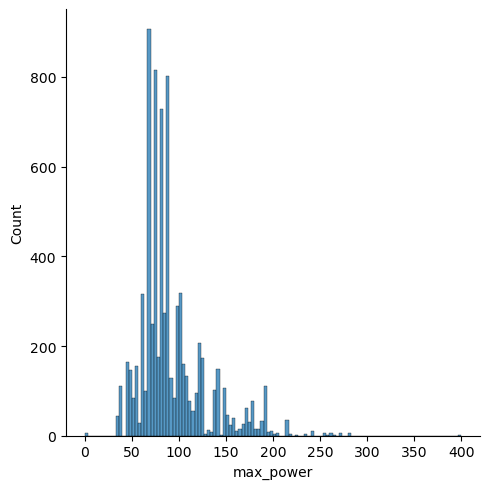

In [38]:
sns.displot(data = df, x = 'max_power') # max_power is left skeweddf

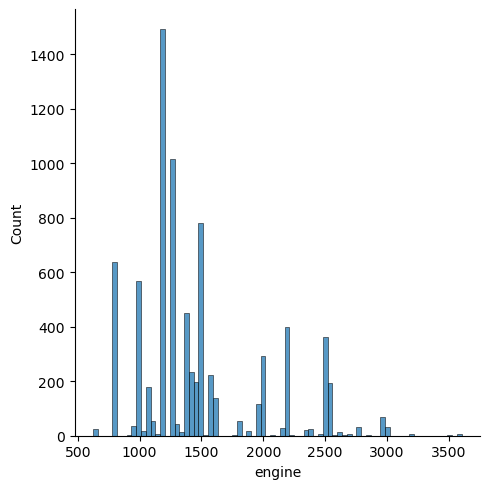

In [39]:
sns.displot(data = df, x = 'engine') # engine is left skewed

### 2.2 Multivariate analysis

Multiple variable exploratory data analysis

#### Boxplot

In [40]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


Text(0.5, 0, 'transmission')

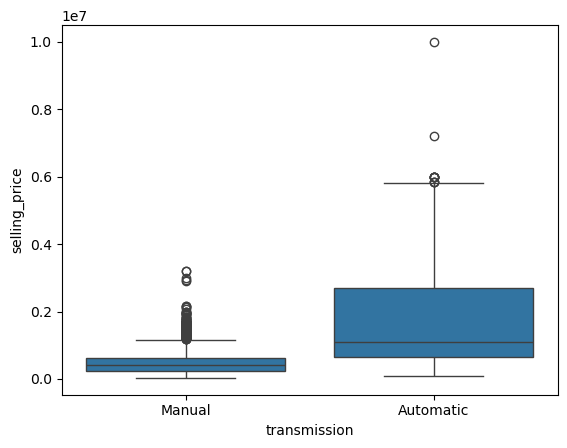

In [41]:
# Let's try bar plot on "Status"
sns.boxplot(x = df['transmission'], y = df['selling_price']);
plt.ylabel('selling_price')
plt.xlabel('transmission')

#### Scatterplot

<Axes: xlabel='year', ylabel='selling_price'>

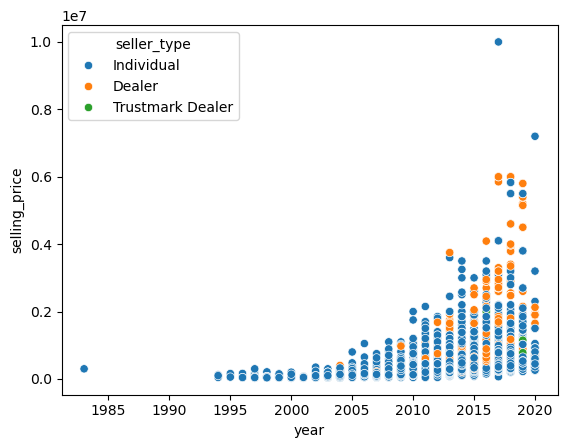

In [42]:
sns.scatterplot(x = df['year'], y = df['selling_price'], hue=df['seller_type'])
# sns.scatterplot(x = df.year, y = df.selling_price, hue = df.transmission)

In [43]:
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


#### Correlation Matrix

According to the features indicated by the questions that 'brand' might not be a significant predictor for car price, however I investigated its potential impact by creating a correlation matrix. Since the correlation matrix requires numerical values, I label-encoded the categorical features 'brand', 'fuel', 'transmission', and 'seller_type'.

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["brand"] = le.fit_transform(df["brand"])

df["brand"].unique()

array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [45]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [46]:
brand = {}
keys = le.classes_
values = df['brand'].unique()
for key in keys:
    for value in values:
        brand[key] = value
        values = np.delete(values, np.where(values == value))
        break

brand

{'Ambassador': 20,
 'Ashok': 27,
 'Audi': 10,
 'BMW': 11,
 'Chevrolet': 29,
 'Daewoo': 9,
 'Datsun': 26,
 'Fiat': 19,
 'Force': 28,
 'Ford': 4,
 'Honda': 7,
 'Hyundai': 6,
 'Isuzu': 14,
 'Jaguar': 21,
 'Jeep': 22,
 'Kia': 2,
 'Land': 30,
 'Lexus': 3,
 'MG': 23,
 'Mahindra': 17,
 'Maruti': 13,
 'Mercedes-Benz': 16,
 'Mitsubishi': 18,
 'Nissan': 31,
 'Opel': 5,
 'Peugeot': 15,
 'Renault': 8,
 'Skoda': 0,
 'Tata': 1,
 'Toyota': 12,
 'Volkswagen': 24,
 'Volvo': 25}

In [47]:
df['fuel'] = le.fit_transform(df['fuel'])

df['fuel'].unique()

array([0, 1])

In [48]:
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [49]:
df['transmission'] = le.fit_transform(df['transmission'])

df['transmission'].unique()

array([1, 0])

In [50]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [51]:
df['seller_type'] = le.fit_transform(df['seller_type'])

df['seller_type'].unique()

array([1, 0, 2])

In [52]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

<Axes: >

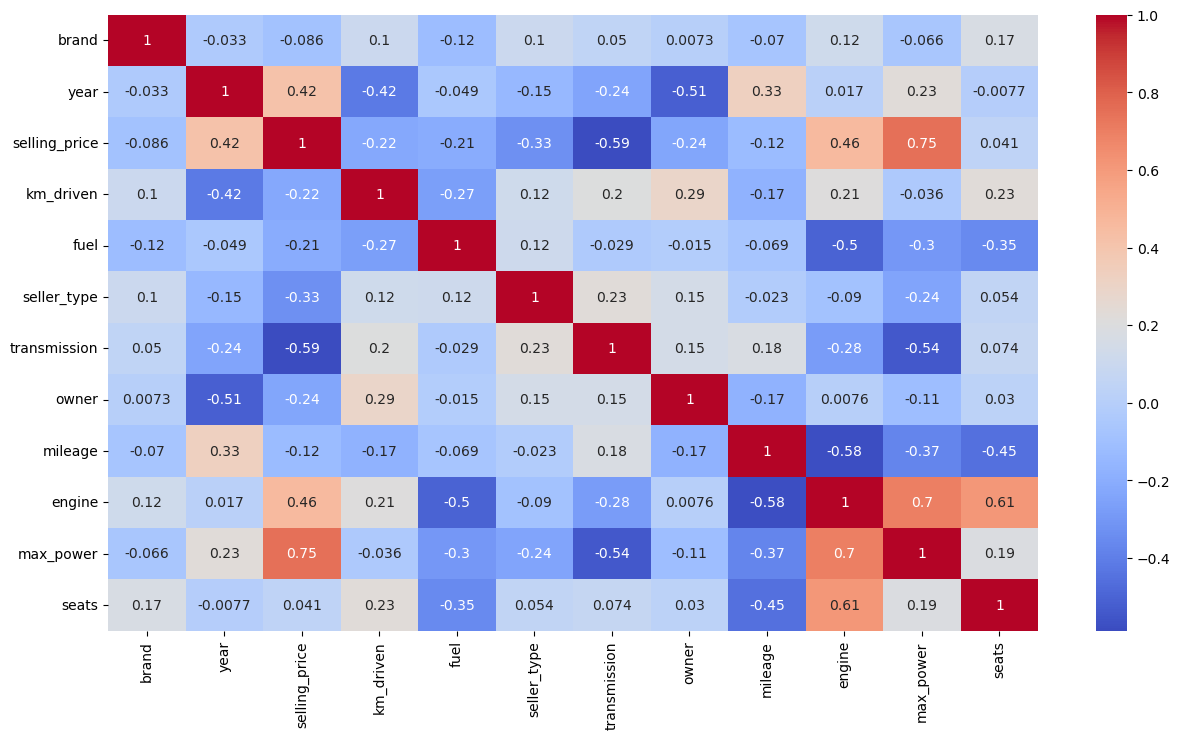

In [53]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

**Predictive Power Score**

The predictive power score library is used to more accurately see the correlation results and confirm our assumptions of the relation of the features to the label.

<Axes: xlabel='x', ylabel='y'>

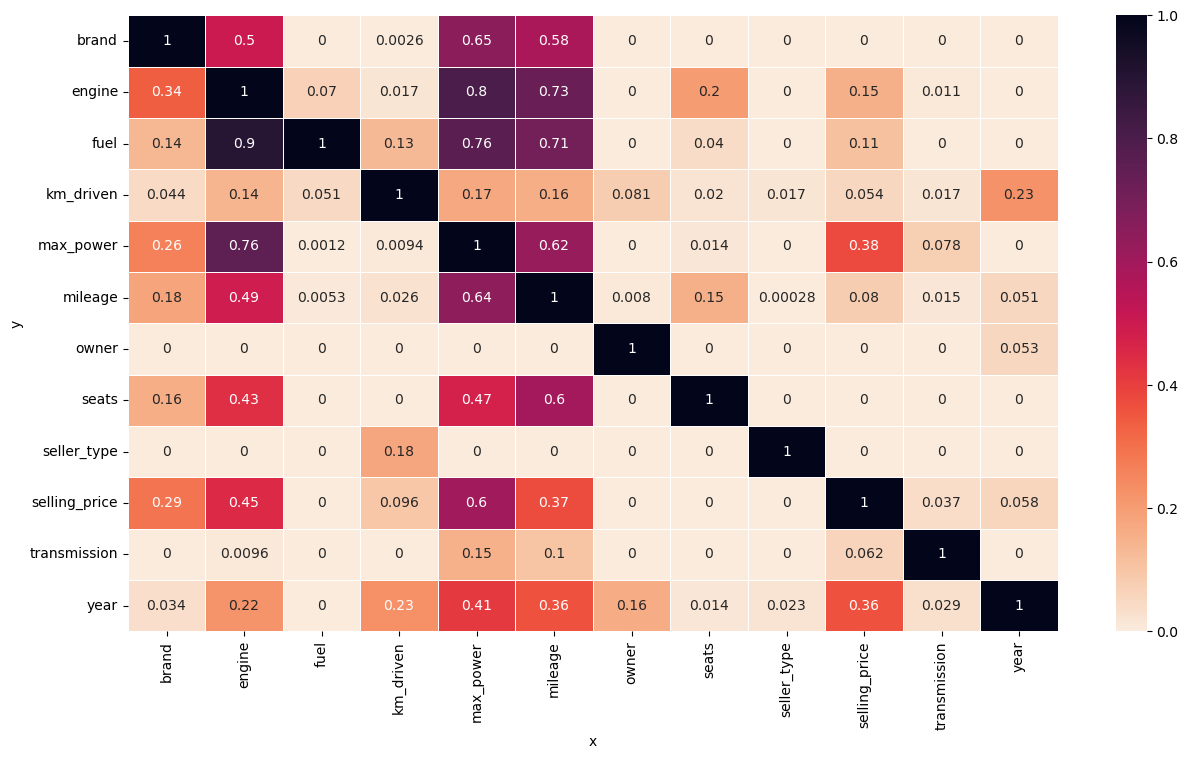

In [54]:
import ppscore as pps

dfcopy = df.copy()

# Preprocessing using pivot
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="rocket_r", linewidths=0.5, annot=True)

## 3. Feature Engineering

Gonna skip for this assignment. 

## 4. Feature selection

The features selected are 'max_power', 'mileage', and 'year' according to the instructions on the question

In [55]:
X = df[['max_power', 'mileage','year']]

y = np.log(df['selling_price'])

In [56]:
print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (8028, 3)
y: (8028,)


### Train test split

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## 5. Preprocessing

### Null values

In [58]:
X_train

,max_power,mileage,year
6853,72.40,13.58,2015
1495,62.10,15.96,2013
7904,88.76,20.77,2013
1281,90.00,18.80,2010
1421,90.00,23.00,2010
...,...,...,...
5293,78.90,20.36,2013
5461,67.04,20.51,2016
865,88.76,20.77,2015
7701,214.56,22.37,2019


In [59]:
#check for null values
X_train[['max_power', 'mileage','year']].isna().sum()

max_power    149
mileage      154
year           0
dtype: int64

In [60]:
X_test[['max_power', 'mileage','year']].isna().sum()

max_power    59
mileage      60
year          0
dtype: int64

In [61]:
y_train.isna().sum()

0

In [62]:
y_test.isna().sum()

0

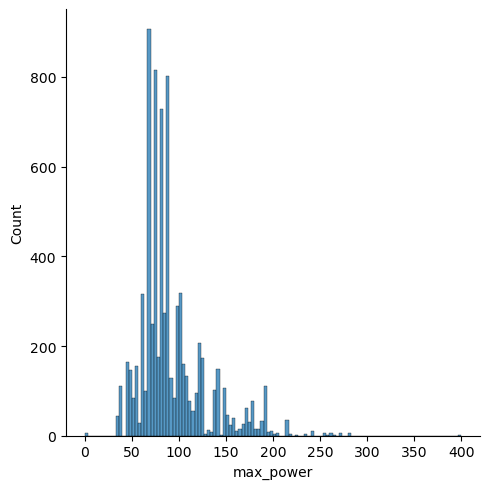

In [63]:
sns.displot(data=df, x='max_power')

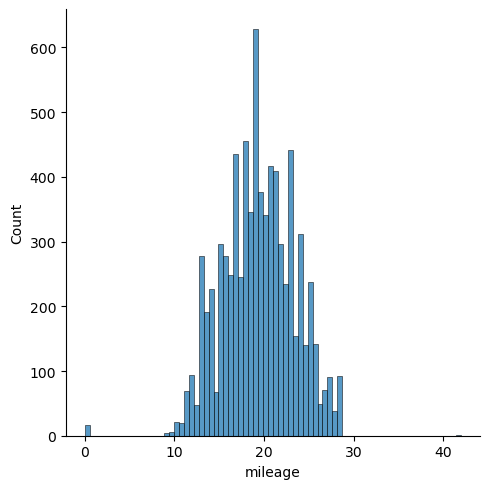

In [64]:
sns.displot(data=df, x='mileage')

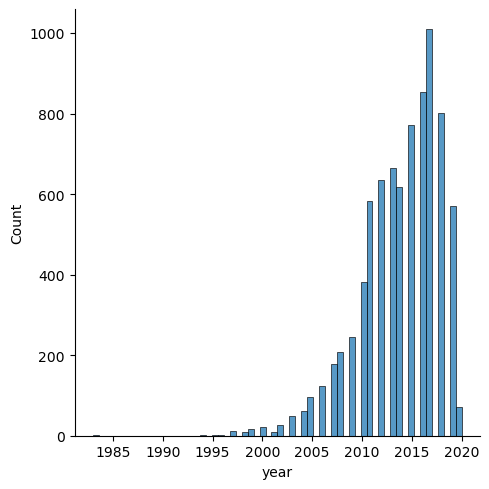

In [65]:
sns.displot(data=df, x='year')

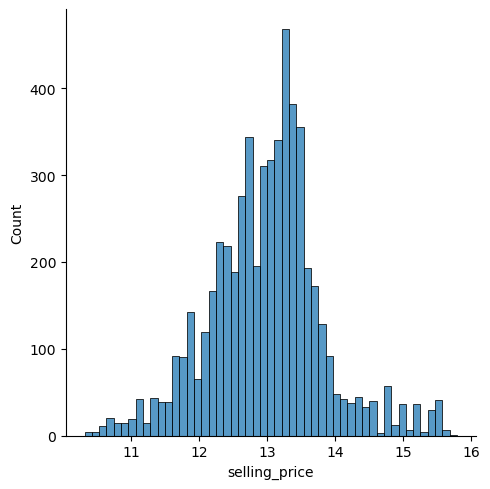

In [66]:
sns.displot(y_train)

In [67]:
# year, max_power are right skewed
# milage is almost normally distributed

Define the default values for imputation according to the question
 - max_power = 82.4 
 - mileage = 19.392
 - year = 2023

This will be dump for the model

In [68]:
year_default = 2023        
mileage_default = 19.392   
max_power_default = 82.4   

In [71]:
#let's fill the training set first!
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
# X_train['year'].fillna(X_train['year'].median(), inplace=True)

In [72]:
#let's fill the testing set with the training distribution first!
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
# X_test['year'].fillna(X_train['year'].median(), inplace=True)

In [73]:
#check again
X_train[['max_power', 'mileage','year']].isna().sum()

max_power    0
mileage      0
year         0
dtype: int64

In [74]:
X_test[['max_power', 'mileage','year']].isna().sum()

max_power    0
mileage      0
year         0
dtype: int64

In [75]:
y_train.isna().sum(), y_test.isna().sum()

(0, 0)

### Checking Outliers

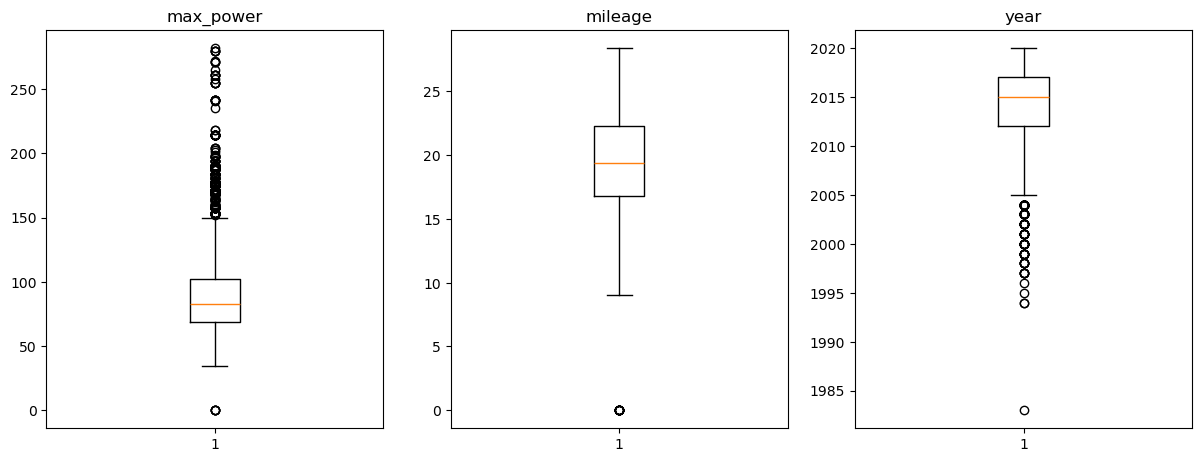

In [76]:
# Create a dictionary of columns.
col_dict = {'max_power':1, 'mileage':2 ,'year': 3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [77]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [78]:
for col in X_train.columns:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%

---------------year---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%


### Scaling

In [79]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [81]:
# y_train = y_train.values
y_train = y_train.to_numpy()


print(f'ytrain: {type(y_train)}')


ytrain: <class 'numpy.ndarray'>


In [82]:
y_train.shape

(5619,)

In [83]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 3)
Shape of X_test:  (2409, 3)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


In [84]:
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [85]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 4)
Shape of X_test:  (2409, 4)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


## 6. Modeling

In [93]:
import mlflow
import os

mlflow.set_tracking_uri("http://localhost:8080") 
os.environ["LOGNAME"] = "kaunghtetcho"
mlflow.set_experiment(experiment_name="A2-final-day")

2025/02/16 13:52:51 INFO mlflow.tracking.fluent: Experiment with name 'A2-final-day' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/257362251198379667', creation_time=1739688771235, experiment_id='257362251198379667', last_update_time=1739688771235, lifecycle_stage='active', name='A2-final-day', tags={}>

In [94]:
import numpy as np
from sklearn.model_selection import KFold
import mlflow

class LinearRegression(object):
    
    kfold = KFold(n_splits=3)
            
    def __init__(self, regularization, lr=0.001, grad='batch', num_epochs=500, batch_size=50, cv=kfold, init_theta='xavier', momentum=0.0):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.grad       = grad
        self.cv         = cv
        self.regularization = regularization
        self.init_theta = init_theta
        self.momentum   = momentum
        self.prev_step  = None

    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    
    def r2_score(self, ytrue, ypred):
        ss_total = ((ytrue - ytrue.mean()) ** 2).sum()
        ss_residual = ((ytrue - ypred) ** 2).sum()
        return 1 - (ss_residual / ss_total)
    
    def initialize_weights(self, n_features):
        if self.init_theta == 'zero':
            return np.zeros(n_features)
        elif self.init_theta == 'xavier':
            lower, upper = - (1.0 / np.sqrt(n_features)), (1.0 / np.sqrt(n_features))
            return lower + np.random.rand(n_features) * (upper - lower)
    
    def fit(self, X_train, y_train):
        
        self.kfold_scores = list()
        self.val_loss_old = np.infty

        y_train = np.array(y_train)  

        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            self.theta = self.initialize_weights(X_cross_train.shape[1])
            self.prev_step = np.zeros_like(self.theta)  
            
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"grad": self.grad, "lr": self.lr, "reg": type(self).__name__, "init_theta": self.init_theta, "momentum": self.momentum}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    perm = np.random.permutation(X_cross_train.shape[0])
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.grad == 'sto':
                        
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_grad_train = X_cross_train[batch_idx].reshape(1, -1)
                            y_grad_train = np.array([y_cross_train[batch_idx]])     

                            train_loss = self._train(X_grad_train, y_grad_train)
                            train_loss = self._train(X_grad_train, y_grad_train)

                    elif self.grad == 'mini':

                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            X_grad_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_grad_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_grad_train, y_grad_train)
                    else:
                        
                        X_grad_train = X_cross_train
                        y_grad_train = y_cross_train
                        train_loss = self._train(X_grad_train, y_grad_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)

                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: {val_loss_new}")
            
    def _train(self, X, y):

        yhat = self.predict(X)
        m = X.shape[0]

        grad = (1/m) * X.T @ (yhat - y)

        if self.regularization is not None:  
            grad += self.regularization.derivation(self.theta)

        step = self.lr * grad
        if self.momentum > 0:
            self.theta = self.theta - step + self.momentum * self.prev_step
            self.prev_step = step
        else:
            self.theta = self.theta - step

        return self.mse(y, yhat)

    
    def predict(self, X):
        return X @ self.theta  
    
    def _coef(self):
        return self.theta[1:]  
                               
    def _bias(self):
        return self.theta[0]
    
    def feature_importance(self):
        feature_names = ["max_power", "mileage", "year"]
        importance_values = [abs(self._coef()[0]), abs(self._coef()[1]), abs(self._coef()[2])]

        plt.figure(figsize=(8, 6))
        plt.barh(feature_names, importance_values, color='blue')
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance Graph')
        plt.xlim([0,max(self._coef())*1.3]) 
        plt.grid(axis='x', linestyle='--', alpha=0.6)

        plt.show()

In [95]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta

class Lasso(LinearRegression):
    def __init__(self, grad, lr, l=0.1, init_theta='xavier', momentum=0.0):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, grad, init_theta=init_theta, momentum=momentum)

class Ridge(LinearRegression):
    def __init__(self, grad, lr, l=0.1, init_theta='xavier', momentum=0.0):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, grad, init_theta=init_theta, momentum=momentum)

class Normal(LinearRegression):
    def __init__(self, grad, lr, init_theta='xavier', momentum=0.0):
        super().__init__(None,  lr, grad, init_theta=init_theta, momentum=momentum)

In [96]:
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [97]:
import numpy as np
import mlflow
from sklearn.preprocessing import PolynomialFeatures

polynomials = ["True", "False"]

regs = ["Ridge", "Lasso", "Normal"]

grads = ["batch", "mini", "sto"]

init_theta = ["zero", "xavier"]

momentums = [0.0, 0.9]

learning_rates = [0.01, 0.001, 0.0001]

POLY_DEGREE = 1
poly_transformer = PolynomialFeatures(degree=POLY_DEGREE)
X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

for poly in polynomials:
    for reg in regs:
        for grad in grads:
            for theta in init_theta:
                for momentum in momentums:
                    for lr in learning_rates:

                        print("="*40)
                        print(f"Using Polynomial Degree: {POLY_DEGREE}" if poly == "True" else "Polynomial: False")
                        print(f"===== Regularization: {reg} =====")
                        print(f"===== Grad: {grad} =====")
                        print(f"===== Init_Method: {theta} =====")
                        print(f"===== Momentum: {momentum} =====")
                        print(f"===== Learning Rate: {lr} =====")
                        print("="*40)
                        
                        type_of_regression = str_to_class(reg)
                        params = {"grad": grad, "lr": lr, "init_theta": theta, "momentum": momentum}

                        if poly == "True":
                            X_train_used = X_train_poly
                            X_test_used = X_test_poly
                        else:
                            X_train_used = X_train
                            X_test_used = X_test

                        with mlflow.start_run(run_name=f"{reg}-grad-{grad}-lr-{lr}-init-{theta}-momentum-{momentum}-poly-{poly}", nested=True):

                            mlflow.log_params(params=params)
                            model = type_of_regression(**params)
                            model.fit(X_train_used, y_train)

                            yhat_train = model.predict(X_train_used)
                            yhat_test = model.predict(X_test_used)
              
                            mlflow.log_metric(key="train_mse", value=model.mse(y_train, yhat_train))
                            mlflow.log_metric(key="train_r2", value=model.r2_score(y_train, yhat_train))
                            mlflow.log_metric(key="test_mse", value=model.mse(y_test, yhat_test))
                            mlflow.log_metric(key="test_r2", value=model.r2_score(y_test, yhat_test))

                            print(f"Completed run: {reg}-grad-{grad}-lr-{lr}-init-{theta}-momentum-{momentum}-poly-{poly}")

                            signature = mlflow.models.infer_signature(X_train_used, model.predict(X_train_used))
                            mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

Using Polynomial Degree: 1
===== Regularization: Ridge =====
===== Grad: batch =====
===== Init_Method: zero =====
===== Momentum: 0.0 =====
===== Learning Rate: 0.01 =====
Fold 0: 1.5620340643835466
🏃 View run Fold-0 at: http://localhost:8080/#/experiments/257362251198379667/runs/636cd3db5f0e474ea00fe73109972c75
🧪 View experiment at: http://localhost:8080/#/experiments/257362251198379667
Fold 1: 1.5065198861906668
🏃 View run Fold-1 at: http://localhost:8080/#/experiments/257362251198379667/runs/b73866d45e88419a9bd8d18a76a1458f
🧪 View experiment at: http://localhost:8080/#/experiments/257362251198379667
Fold 2: 1.5044323963920108
🏃 View run Fold-2 at: http://localhost:8080/#/experiments/257362251198379667/runs/c87bedb6cdf44f5e848f14379dccb748
🧪 View experiment at: http://localhost:8080/#/experiments/257362251198379667
Completed run: Ridge-grad-batch-lr-0.01-init-zero-momentum-0.0-poly-True
🏃 View run Ridge-grad-batch-lr-0.01-init-zero-momentum-0.0-poly-True at: http://localhost:8080/#/

![
](attachment:image.png)

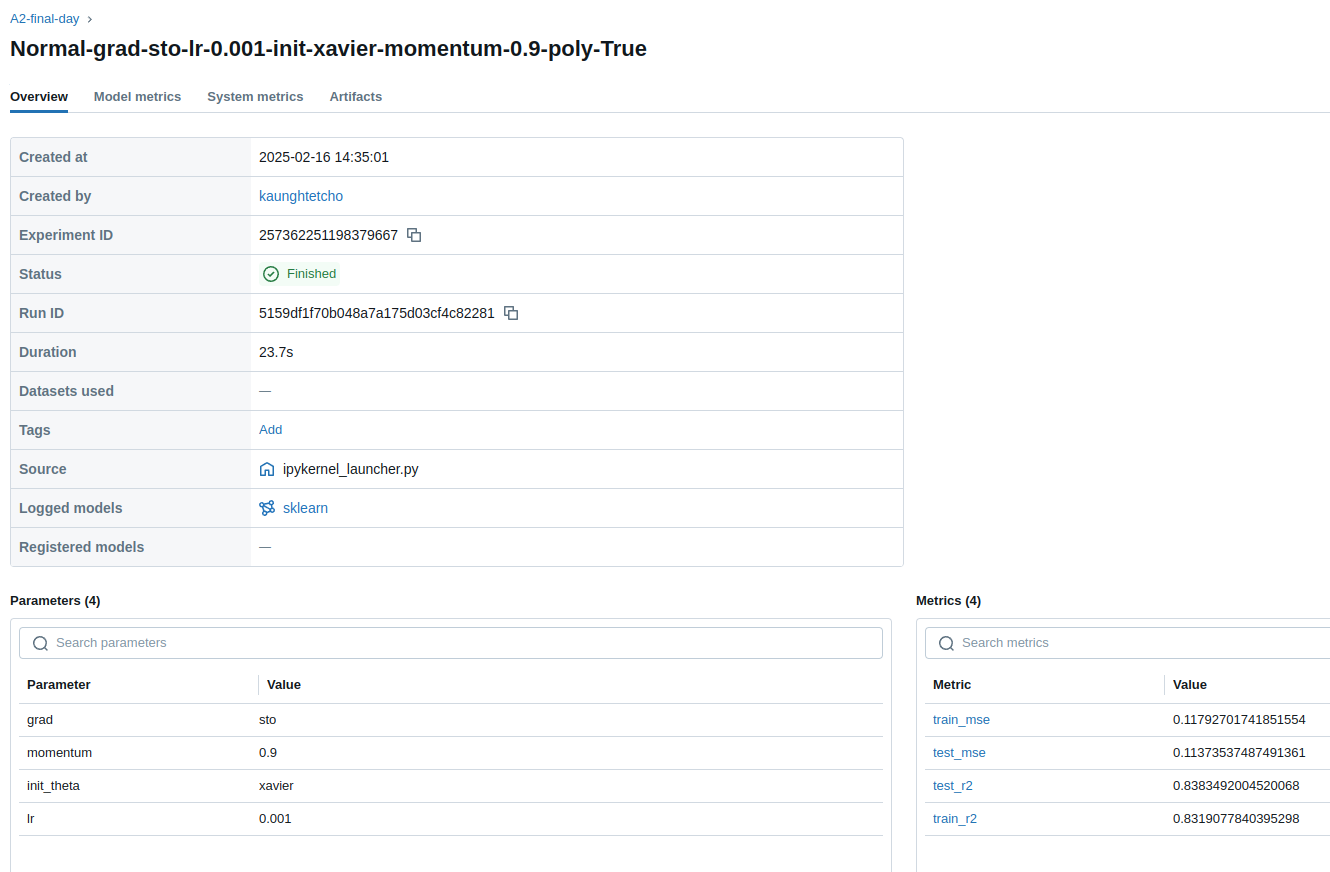

In [98]:
import numpy as np
import mlflow
from sklearn.preprocessing import PolynomialFeatures

polynomials = ["True"]

regs = ["Normal"]

grads = ["sto"]

init_theta = ["xavier"]

momentums = [0.9]

learning_rates = [0.001]

for poly in polynomials:
    for reg in regs:
        for grad in grads:
            for theta in init_theta:
                for momentum in momentums:
                    for lr in learning_rates:

                        print("="*40)
                        print(f"Using Polynomial Degree: {POLY_DEGREE}" if poly == "True" else "Polynomial: False")
                        print(f"===== Regularization: {reg} =====")
                        print(f"===== Grad: {grads} =====")
                        print(f"===== Init_Method: {init_theta} =====")
                        print(f"===== Momentum: {momentum} =====")
                        print(f"===== Learning Rate: {lr} =====")
                        print("="*40)
                        
                        type_of_regression = str_to_class(reg)
                        params = {"grad": grad, "lr": lr, "init_theta": theta, "momentum": momentum}

                        if poly == "True":
                            POLY_DEGREE = 1
                            poly_transformer = PolynomialFeatures(degree=POLY_DEGREE, include_bias=False)
                            X_train_poly = poly_transformer.fit_transform(X_train)
                            X_test_poly = poly_transformer.transform(X_test)

                            X_train_used = X_train_poly
                            X_test_used = X_test_poly

                        else:
                            X_train_used = X_train
                            X_test_used = X_test

                        model = type_of_regression(**params)
                        model.fit(X_train_used, y_train)

Using Polynomial Degree: 1
===== Regularization: Normal =====
===== Grad: ['sto'] =====
===== Init_Method: ['xavier'] =====
===== Momentum: 0.9 =====
===== Learning Rate: 0.001 =====
Fold 0: 0.12739521618987035
🏃 View run Fold-0 at: http://localhost:8080/#/experiments/257362251198379667/runs/8d933edfa2f94f5d9550296ea7b53e72
🧪 View experiment at: http://localhost:8080/#/experiments/257362251198379667
Fold 1: 0.11833866599557338
🏃 View run Fold-1 at: http://localhost:8080/#/experiments/257362251198379667/runs/56200d347630485cbb6d40e0beb863ae
🧪 View experiment at: http://localhost:8080/#/experiments/257362251198379667
Fold 2: 0.10963474162254107
🏃 View run Fold-2 at: http://localhost:8080/#/experiments/257362251198379667/runs/8b228fa9307348bc926811f2f0299aaa
🧪 View experiment at: http://localhost:8080/#/experiments/257362251198379667


In [99]:
# Testing our model using the testing set and showing the mse and r2
yhat = model.predict(X_test)
mse  = model.mse(y_test, yhat)
r2 = model.r2_score(y_test, yhat)
print("MSE :", mse)
print("R2 :", r2)

MSE : 0.11352086479983015
R2 : 0.8386540811910598


In [100]:
year_default = 2023        
mileage_default = 19.392   
max_power_default = 82.4   

In [101]:
import pickle
model_package = {
    'model': model,
    'scaler': scaler,
    'max_power': max_power_default,
    'mileage': mileage_default,
    'year': year_default
}

## 7. Analysis:  Feature Importance

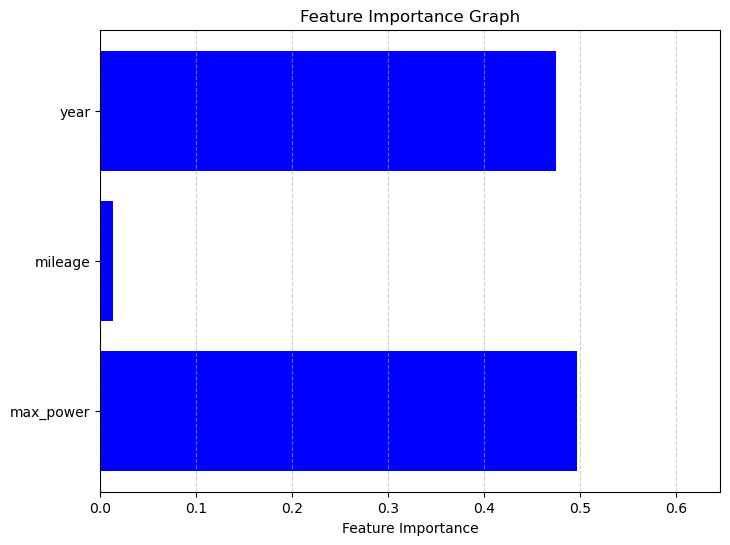

In [102]:
model.feature_importance()


## 8. Inference

In [103]:
import pickle

# Save the model to disk
filename = '../models/car_price_new.model'
pickle.dump(model_package, open(filename, 'wb'))

In [104]:
loaded_data = pickle.load(open(filename, 'rb'))

In [105]:
# Loading the model and scaler to test
loaded_model = loaded_data['model']
loaded_scaler = loaded_data['scaler']

In [106]:
#['name', 'engine', 'mileage'] 
sample = np.array([[82.4, 19.392, 2024]])

sample_scaled = loaded_scaler.transform(sample)
intercept = np.ones((sample_scaled.shape[0], 1))

sample_scaled_concat  = np.concatenate((intercept, sample_scaled), axis=1)
sample_scaled_concat

array([[ 1.        , -0.26521058, -0.00628168,  2.53521298]])

In [107]:
predicted_price = model.predict(sample_scaled_concat)
predicted_price = np.exp(predicted_price)  

print(f"Predicted Car Price: {predicted_price}")

Predicted Car Price: [1275760.59712653]
